# Data Sets

The selected data is an extended version of the well known Iris dataset. It contains 1200 rows and it has new attributes added 
compared to the original one, which only has 4(petal_length, petal_width, sepal_length, sepal_width, species).The main goal of each algorithm to determine the type of the iris, when it's given information about the sepals and petals.

### Columns
- __Elevation__ : Elevation level where the iris was found(m)
- __Soilt Type__ : Type of soil where the iris was found(Loamy, Sandy, Clayey)

- __Sepal Length__ : Length of the sepal(cm)
- __Sepal Width__ : Width of the sepal(cm)
- __Petal Length__ :  Length of the petal(cm)
- __Petal Width__ : Width of the petal(cm)

- __Sepal Area__ : Area of the sepal calculated as Sepal Length x Sepal Width(cm^2)
- __Petal Area__ : Area of the petal calculated as Petal Length x Petal Width(cm^2)
- __Setal Ascpect Ratio__ : Ratio of Sepal Length to Sepal Width
- __Petal Ascpect Ratio__ : Ratio of Petal Length to Petal Width
- __Sepal to Petal Length ratio__ : Ratio of Sepal Length to Petal Length
- __Sepal to Petal Width ratio__ : Ration of Sepal Width to Petal Width
- __Sepal to Petal Length difference__ : Difference between Sepal Length and Petal Length
- __Sepal to Petal Width difference__ : Difference between Sepal Width and Petal Width

- __Petal Curvature__ : Measure the petal curavature(mm)
- __Petal Texture__ :  Number of trichomes per square millimeter on the petal
- __Leaf Area__ : Area of a typical leaf of the iris plant(cm^2)

- __Sepal Area Sqrt__ : Square root of the Sepal Area
- __Petal Area Sqrt__ : Square root of the Petal Area
- __Area Ratios__ : Custom attribute that captures various area ratios in the dataset


### Features

- Setosa(Represented as 0)
- Vericolor(Represented as 1)
- Virginica(Represented as 2)

In [1]:
#----------------------Import libraries------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.neural_network import MLPClassifier

In [2]:
ts = pd.read_csv("E:\\data_set\\flowers\\iris_extended.csv")

In [3]:
ts.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,0,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,0,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,0,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,0,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,0,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


In [4]:
y = ts['species'].to_numpy()

In [5]:
x = ts.iloc[:,1:].to_numpy()

In [6]:
#Remove the first 3 columns
x = ts.iloc[:,3:].to_numpy()

In [7]:
#Splitting the data to testing and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 123)

## Data Visualization

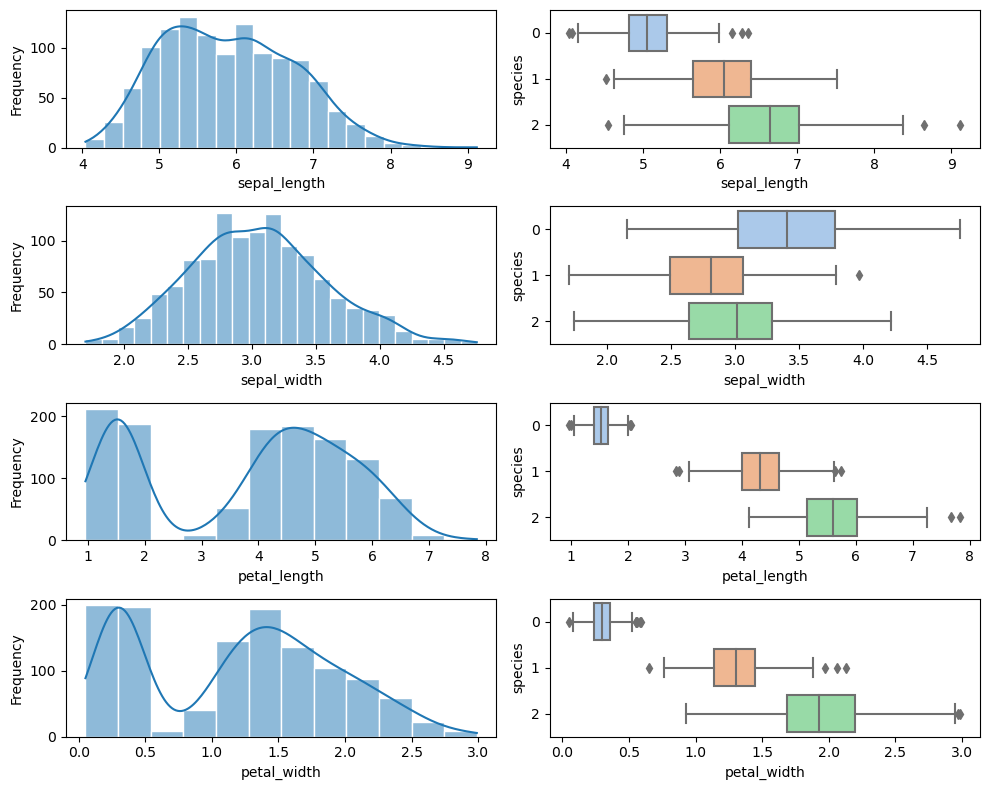

In [8]:
selected_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


#Subplots : 4 rows, 2 columns
f, ax = plt.subplots(4, 2, figsize=(10, 8))

ts['species'] = ts['species'].astype('category')

colors = sns.color_palette("pastel")

for i, col in enumerate(selected_columns):
    sns.histplot(data=ts, x=col, kde=True, ax=ax[i, 0], edgecolor = 'white')
    ax[i, 0].set_ylabel('Frequency')
    ax[i, 0].set_xlabel(col)
    
    sns.boxplot(data=ts, x=col, y='species', ax=ax[i, 1], palette=colors[:len(ts['species'].unique())])
    
plt.tight_layout()
plt.show()

ts['species'] = ts['species'].astype(int)

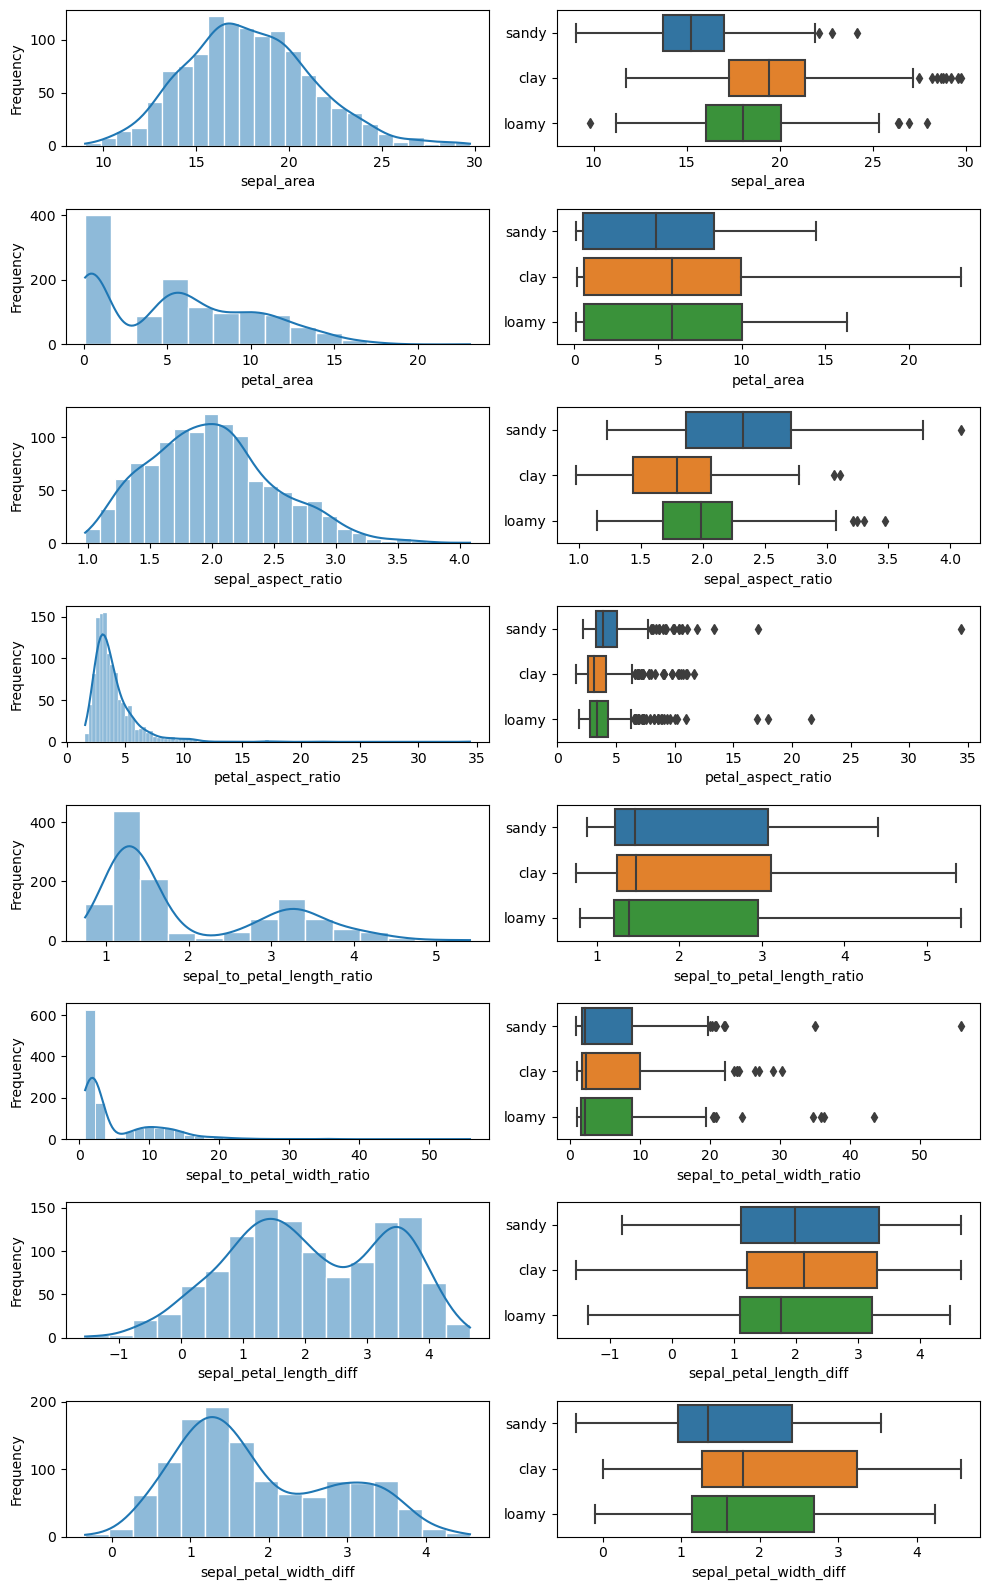

In [9]:
selected_columns2= ['sepal_area', 'petal_area', 'sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_to_petal_length_ratio', 
                   'sepal_to_petal_width_ratio', 'sepal_petal_length_diff', 'sepal_petal_width_diff']

#Subplots : 8 rows, 2 columns
f, ax = plt.subplots(8, 2, figsize=(10, 16))

for i, col in enumerate(selected_columns2):
    sns.histplot(data=ts, x=col, kde=True, ax=ax[i, 0], edgecolor = 'white')
    ax[i, 0].set_ylabel('Frequency')
    ax[i, 0].set_xlabel(col)
    
    sns.boxplot(data = ts, x=col, y="soil_type", ax=ax[i, 1])
    ax[i, 1].set_ylabel('')
    
plt.tight_layout()
plt.show()

## 3D Visualization

C:\Users\costa\AppData\Local\Temp\ipykernel_26628\2595581543.py:22: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
C:\Users\costa\AppData\Local\Temp\ipykernel_26628\2595581543.py:24: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
C:\Users\costa\AppData\Local\Temp\ipykernel_26628\2595581543.py:26: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


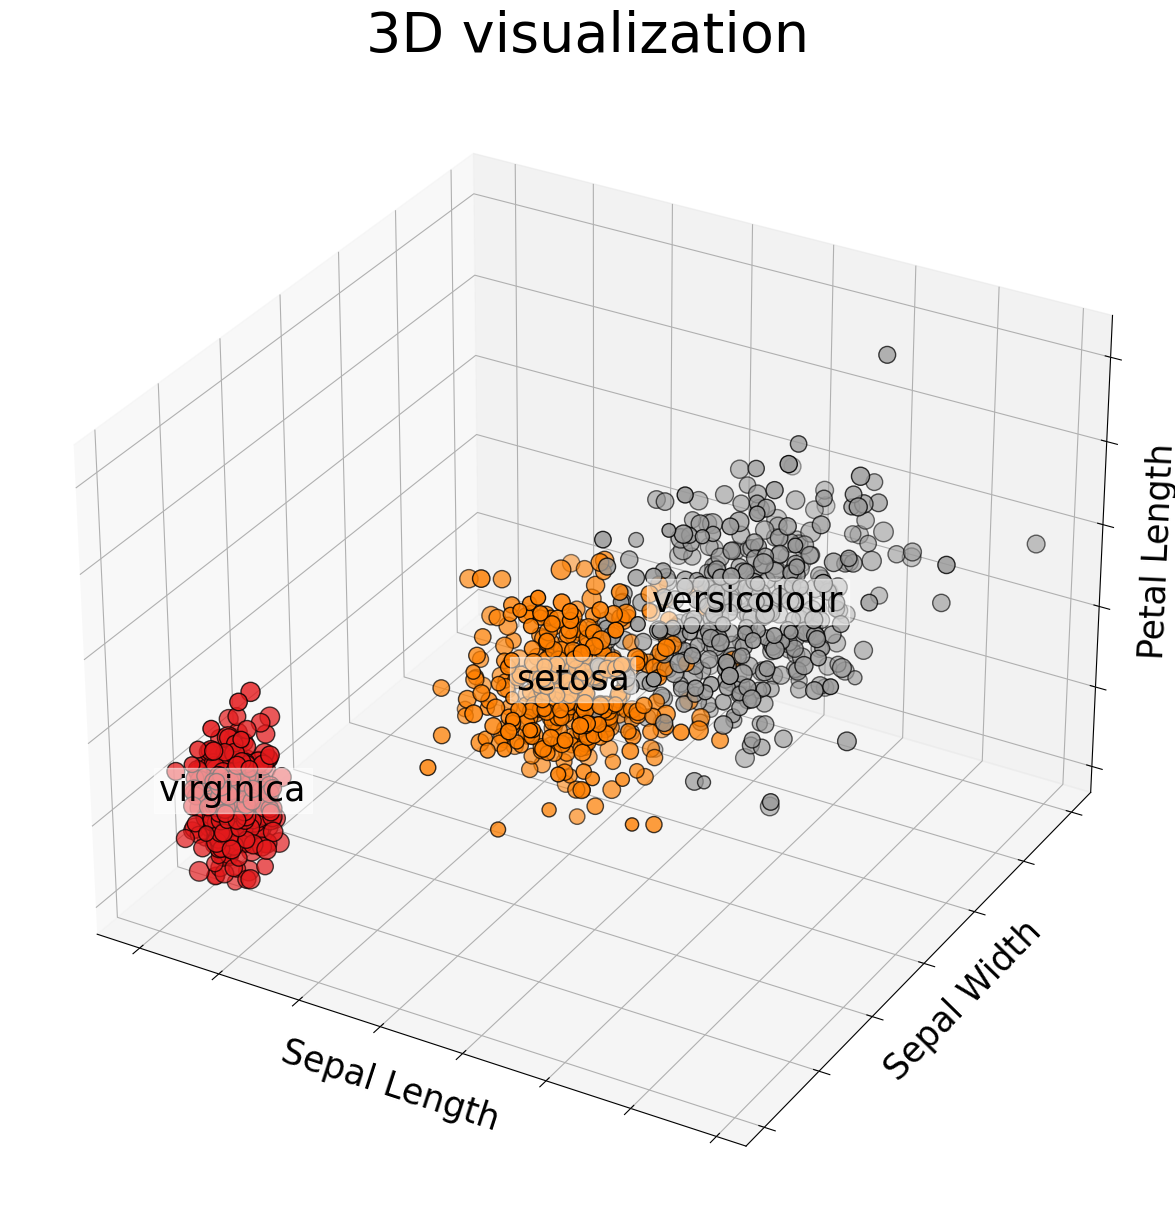

In [10]:
cols_for_3d = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
X_3d = ts[cols_for_3d].values
Y_3d = ts['species'].values


le = LabelEncoder()
#Transforms the labels to 0, 1, 2...
Y_3d = le.fit_transform(Y_3d)


fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev = 50, azim = 140)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=Y_3d, cmap = plt.cm.Set1, edgecolor='k', s=X_3d[:, 3]*50)

for name, label in [('virginica', 0), ('setosa', 1), ('versicolour', 2)]:
    ax.text3D(X_3d[Y_3d == label, 0].mean(), X_3d[Y_3d == label, 1].mean(), X_3d[Y_3d == label, 2].mean(), name, horizontalalignment='center', bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)
    

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length", fontsize=25)
ax.w_zaxis.set_ticklabels([])
    
plt.show()

### 2D Visualization

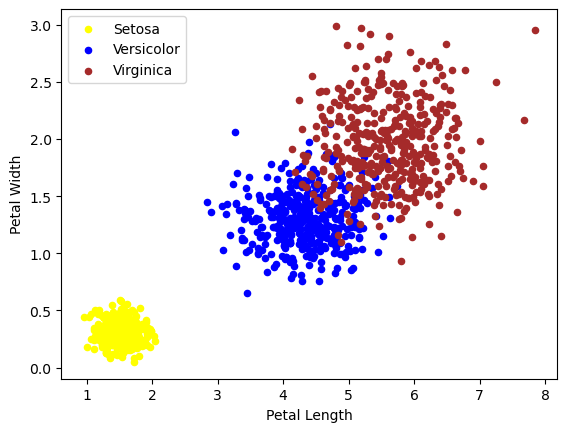

In [11]:
graph = ts[ts.species==0].plot(kind ='scatter', x='petal_length', y='petal_width', color='yellow', label='Setosa')
ts[ts.species==1].plot(kind = 'scatter', x='petal_length', y='petal_width', color='blue', label='Versicolor', ax= graph)
ts[ts.species==2].plot(kind = 'scatter', x='petal_length', y='petal_width', color='brown', label='Virginica', ax = graph)


graph.set_xlabel('Petal Length')
graph.set_ylabel('Petal Width')
graph = plt.gcf()
plt.show()

# PCA

We will calculate the covarience matrix with the following formula:

## $$ Cov(X,Y) = \frac{ \sum_{i=1}^{n} (X_i - \bar{X}) * (Y_i - \bar{Y}) }{ n - 1 } $$

In [12]:
def pca(X, n):
    #The number of components we want to keep
    mean = np.mean(X, axis = 0)
    X = X - mean
    
    cov = np.cov(X.T)
    
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    
    eigenvectors = eigenvectors.T
    i = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[i]
    eigenvectors = eigenvectors[:, i]
    
    
    comp = eigenvectors[:,:n]
    
    
    x_pca = X.dot(comp)
    
    
    plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
    plt.title("PCA")
    plt.xlabel("First component")
    plt.ylabel("Second component")
    plt.show


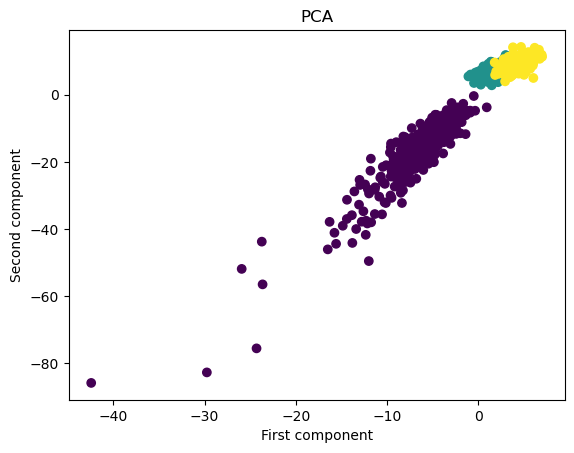

In [13]:
pca(x, 2)

# Least Squares

In [14]:
#Calculate the mean for each feature

def cal_mean(x):
    return np.mean(x)

mean_x = cal_mean(x_train[:,2])
mean_y = cal_mean(x_train[:,3])

#### We use the following formulas to calculate the values of slope and y-intercept (Training Step)
## $$ c = y - mx$$

## $$m = \frac{ n \sum {}xy - (\sum x)(\sum y) }{ n\sum x^{2} - (\sum x)^{2} }$$

## Training

In [15]:
n = len(x_train)

num1 = 0
num2 = 0

petal_length_column = x_train[:,2]
petal_width_column = x_train[:,3]

petal_length_column2 = x_test[:,2]
petal_width_column2 = x_test[:,3]

for i in range(n):
    num1 += (petal_length_column[i] - mean_x) * (petal_width_column[i] - mean_y)
    num2 += (petal_length_column[i] - mean_x) ** 2
    
m = num1/num2
c = mean_y - (m * mean_x)

print('Slope: ', m , "y-intercept: ", c)

Slope:  0.37369908406207364 y-intercept:  -0.23108731892213896


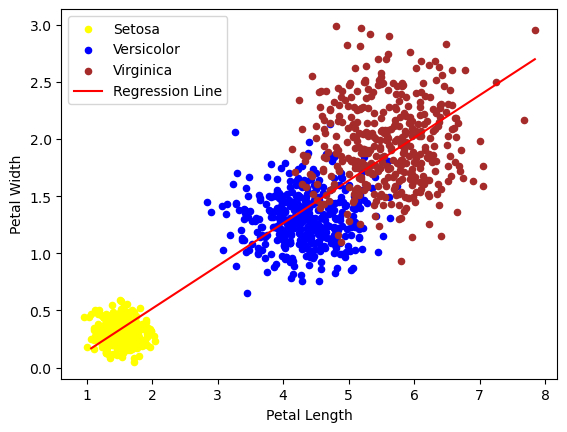

In [16]:
w = np.linspace(np.max(petal_length_column), np.min(petal_length_column), 1000)
y = c + m * w

g = ts[ts.species==0].plot(kind ='scatter', x='petal_length', y='petal_width', color='yellow', label='Setosa')
ts[ts.species==1].plot(kind = 'scatter', x='petal_length', y='petal_width', color='blue', label='Versicolor', ax= g)
ts[ts.species==2].plot(kind = 'scatter', x='petal_length', y='petal_width', color='brown', label='Virginica', ax = g)


plt.plot(w, y, label='Regression Line', color='red')

g.set_xlabel('Petal Length')
g.set_ylabel('Petal Width')
g = plt.gcf()
plt.legend()
plt.show()

## Testing

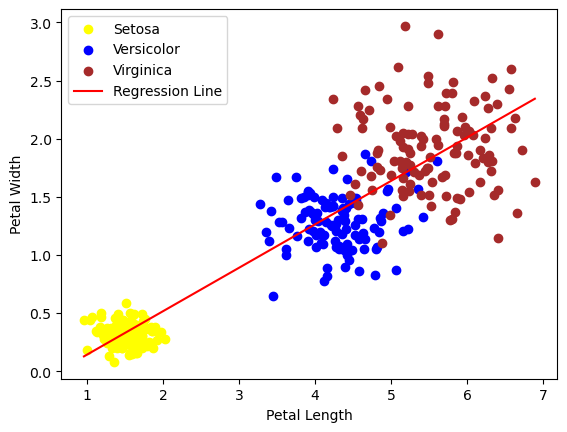

In [17]:
x1 = np.linspace(np.max(petal_length_column2), np.min(petal_length_column2), 1000)
y1 = c + m * x1

plt.scatter(x_test[y_test == 0, 2], x_test[y_test == 0, 3], color='yellow', label='Setosa')
plt.scatter(x_test[y_test == 1, 2], x_test[y_test == 1, 3], color='blue', label='Versicolor')
plt.scatter(x_test[y_test == 2, 2], x_test[y_test == 2, 3], color='brown', label='Virginica')

plt.plot(x1, y1, label='Regression Line', color='red')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In order to check if our model is weak or strong we calculate the value of R-squared using the following formula:


## $$R^{2} = 1 - \frac{SS_r  }{ SS_t}$$

In [18]:
n1 = len(x_test)

ss_tot = 0
ss_res = 0
for i in range(n1):
    y_pred = c + m * petal_length_column2[i]
    ss_tot += (petal_width_column2[i] - mean_y) ** 2
    ss_res += (petal_width_column2[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)

print("R2 score: ", r2)

R2 score:  0.8261606245304481


Our score is close to 1 so that shows us that our model is strong and can be used for more predictions

## Training

## KNN

In order to calculate the distance between 2 data points we will use the Euclidian distance.

### $$d(x, y) = \sqrt{\sum_{i=1}^{n} (y_i - x_i) ^ {2}}$$

In [24]:
def euclidian(p1, p2):
    dist = 0
    for i in range(len(p1)):
        dist = dist + np.square(p1[i] - p2[i])
    dist = np.sqrt(dist)
    return dist

In [25]:

def knn(x_train, y_train, x_test, k):
    predictions = []
    
    for i in range(len(x_test)):
        new_dist = np.zeros(len(y_train))
        
        for j in range(len(y_train)):
            new_dist[j] = euclidian(x_train[j, :], x_test[i, :])
            
        new_dist = np.array([new_dist, y_train])
        
        idx = np.argsort(new_dist[0, :])
        counts = np.bincount(new_dist[1, idx[:k]].astype(int))
        
        prediction = np.argmax(counts)
        predictions.append(prediction)
        
    return predictions

## Training data set

For k =  1  the accuracy is  1.0
For k =  2  the accuracy is  0.9940476190476191
For k =  3  the accuracy is  0.9976190476190476
For k =  4  the accuracy is  0.9904761904761905
For k =  5  the accuracy is  0.9940476190476191
For k =  6  the accuracy is  0.9928571428571429
For k =  7  the accuracy is  0.9916666666666667
For k =  8  the accuracy is  0.9904761904761905
For k =  9  the accuracy is  0.9916666666666667
For k =  10  the accuracy is  0.9880952380952381


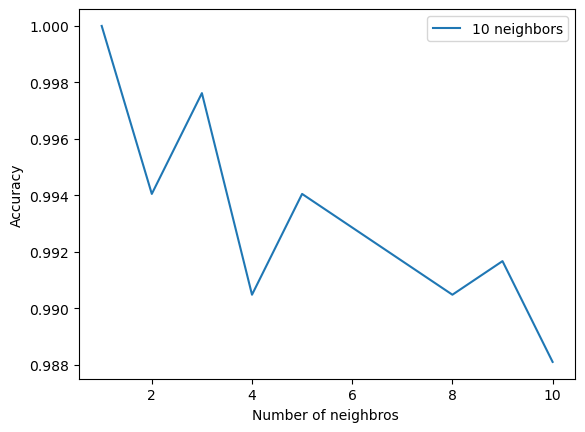

In [26]:
acc = []
k = []
for i in range(1, 11):
    accuracy = accuracy_score(knn(x_train, y_train, x_train, i), y_train)
    print("For k = ", i, " the accuracy is ", accuracy)
    acc.append(accuracy)
    k.append(i)
    
    
plt.plot(k, acc, label = f'{i} neighbors')
plt.xlabel("Number of neighbros ")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Testing data set

Running the Knn algorithm for k = 1, 2, 3, ... 10

For k =  1  the accuracy is  0.9861111111111112
For k =  2  the accuracy is  0.9861111111111112
For k =  3  the accuracy is  0.9861111111111112
For k =  4  the accuracy is  0.9861111111111112
For k =  5  the accuracy is  0.9861111111111112
For k =  6  the accuracy is  0.9861111111111112
For k =  7  the accuracy is  0.9861111111111112
For k =  8  the accuracy is  0.9916666666666667
For k =  9  the accuracy is  0.9916666666666667
For k =  10  the accuracy is  0.9916666666666667


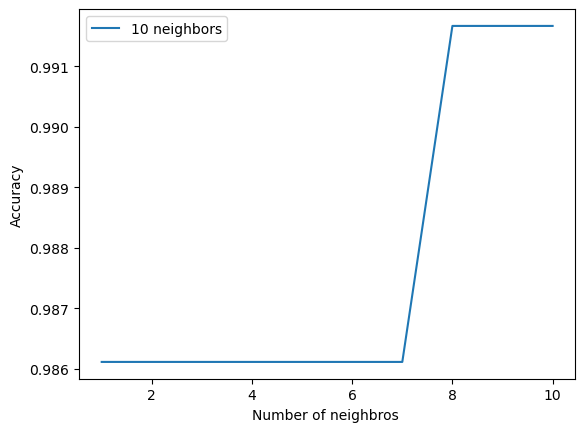

In [27]:
acc = []
k = []
for i in range(1, 11):
    accuracy = accuracy_score(knn(x_train, y_train, x_test, i), y_test)
    print("For k = ", i, " the accuracy is ", accuracy)
    acc.append(accuracy)
    k.append(i)
    
    
plt.plot(k, acc, label = f'{i} neighbors')
plt.xlabel("Number of neighbros ")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Now we will use the library sklearn to compare our results

In [28]:
for i in range(1, 11):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)

    knn_classifier.fit(x_train, y_train)

    y_pred = knn_classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

Accuracy: 0.9861111111111112
Accuracy: 0.9861111111111112
Accuracy: 0.9861111111111112
Accuracy: 0.9861111111111112
Accuracy: 0.9861111111111112
Accuracy: 0.9861111111111112
Accuracy: 0.9861111111111112
Accuracy: 0.9916666666666667
Accuracy: 0.9916666666666667
Accuracy: 0.9916666666666667


# Naive Bayes

In [29]:
def calc_class_priors(y):

    # get the unique classes and their counts
    classes, counts = np.unique(y, return_counts=True)

    # calculate the class priors as the ratio of the class counts to the total number of samples
    priors = counts / len(y)

    return classes, priors

def calc_likelihood(x, mean, variance):

    # compute the exponent term in the gaussian distribution
    exponent = np.exp(-((x - mean) ** 2) / (2 * variance))

    # return the likelihood based on the gaussian  distibution formula
    return (1 / (np.sqrt(2 * np.pi * variance))) * exponent

In [30]:
def fit(x, y):

    # calculate the classes priors
    classes, priors = calc_class_priors(y)

    # calculate mean values for each feature in each class
    means = []
    for c in classes:

        # use the .tolist() because we want a flat list
        mean = np.mean(x[y == c], axis=0).tolist()
        means.append(mean)

    # calculate the variance values for each feature in each class
    variances = []
    for c in classes:

        # use the .tolist() because we want a flat list
        variance = np.var(x[y == c], axis=0).tolist()
        variances.append(variance)

    return classes, priors, means, variances

def predict_prob(x, classes, priors, means, variances):

    probs = []

    for x_in in x:

        class_probs = []

        for i, c in enumerate(classes):

            class_prob = np.log(priors[i])

            for j in range(len(x_in)):

                class_prob += np.log(calc_likelihood(x_in[j], means[i][j], variances[i][j]))
            class_probs.append(class_prob)

        probs.append(class_probs)

    return np.array(probs)

def predict(x, classes, priors, means, variances):

    # get the class index with the highest probability
    return np.argmax(predict_prob(x, classes, priors, means, variances), axis=1)

Training Accuracy :  0.9733333333333334
Accuracy :  0.9816666666666667


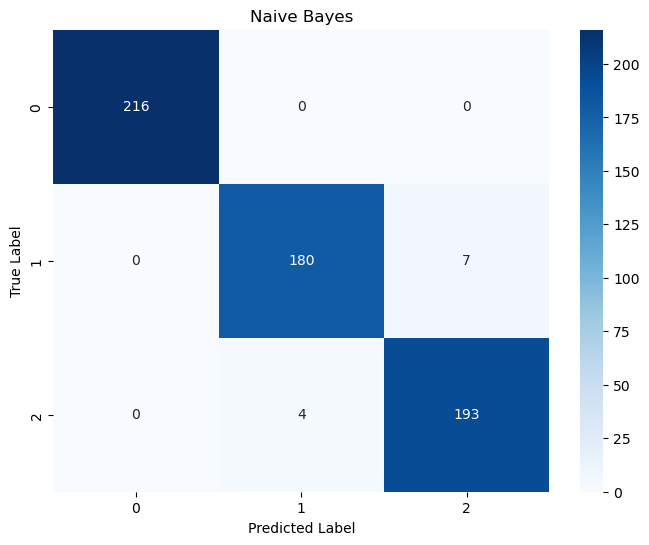

In [31]:
ts = pd.read_csv("E:\\data_set\\flowers\\iris_extended.csv")

ts.head()

y = ts['species'].to_numpy()

x = ts.iloc[:,1:].to_numpy()

x = ts.iloc[:,3:].to_numpy()

# split the data to testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state= 123)

# turn off (so we ignore the runtime warning)
np.seterr(divide = 'ignore') 

# TRAINING
classes, priors, means, variances = fit(x_train, y_train)
train_pred = predict(x_train, classes, priors, means, variances)
train_accuracy = accuracy_score(y_train, train_pred)
print("Training Accuracy : ", train_accuracy)

test_pred = predict(x_test, classes, priors, means, variances)

test_accuracy = accuracy_score(y_test, test_pred)
print("Accuracy : ", test_accuracy)

np.seterr(divide = 'warn')

cm = confusion_matrix(y_test, test_pred)

# plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Now let's compare out results with the sklearn library

Sklearn Accuracy :  0.9816666666666667


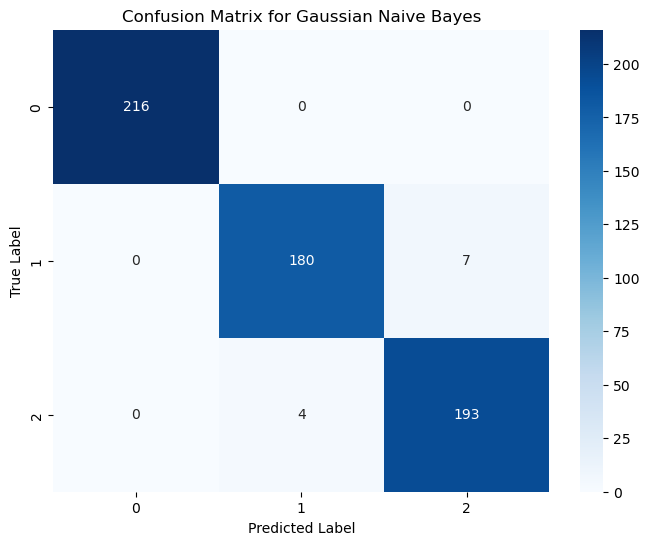

In [32]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Sklearn Accuracy : ", accuracy)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gnb.classes_, yticklabels=gnb.classes_)
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Multilayer Perceptron

Training Accuracy: 0.9916666666666667
Testing Accuracy: 0.9916666666666667


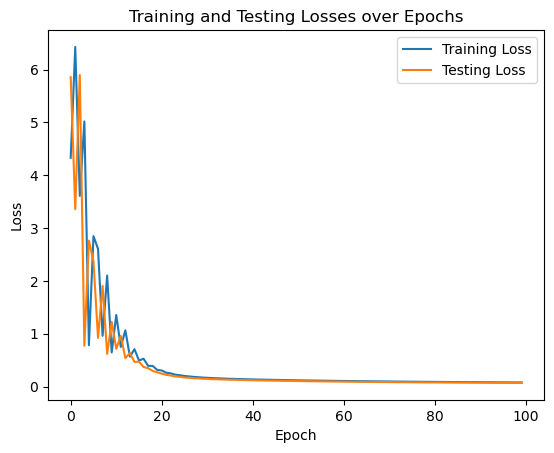

In [33]:
# define the architecture of the MLP algorithm
def build_model(input_size, hidden_size, output_size):

    model = nn.Sequential(nn.Linear(input_size, hidden_size),
                            nn.ReLU(),
                            nn.Linear(hidden_size, output_size))
    
    # return the model
    return model

def train_mlp(x_train, y_train, x_test, y_test, input_size, hidden_size, output_size, learning_rate, num_epochs):

    model = build_model(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    # holds the training/testing losses
    train_losses = []
    test_losses = []
    
    for epoch in range(num_epochs):

        optimizer.zero_grad()
        outputs = model(x_train)
        train_loss = criterion(outputs, y_train)
        train_loss.backward()
        optimizer.step()
        
        with torch.no_grad():

            test_outputs = model(x_test)
            test_loss = criterion(test_outputs, y_test)
        
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
    
    return model, train_losses, test_losses

def evaluate_mlp(x_test, y_test, model):

    outputs = model(x_test)
    i, predicted = torch.max(outputs, 1)
    accuracy = torch.sum(predicted == y_test).item() / len(y_test)

    return accuracy

# ------------------- RUNNING -------------------

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 123)

# convert data from dataset to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

input_size = x_train.shape[1]
hidden_size = 64
output_size = len(torch.unique(y_train_tensor))
learning_rate = 0.01
num_epochs = 100

model, train_losses, test_losses = train_mlp(x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor, input_size, hidden_size, output_size, learning_rate, num_epochs)
train_accuracy = evaluate_mlp(x_train_tensor, y_train_tensor, model)
print("Training Accuracy:", train_accuracy)

test_accuracy = evaluate_mlp(x_test_tensor, y_test_tensor, model)
print("Testing Accuracy:", test_accuracy)

plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses over Epochs')
plt.legend()
plt.show()

## Testing our results with the results of sklearn

In [34]:

# split the data to testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 123)
# ---

# Instantiate the model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000, random_state=123,
                               learning_rate_init=0.01, solver='sgd')

mlp_classifier.fit(x_train, y_train)
y_pred = mlp_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"scikit-learn MLP Accuracy: {accuracy}")

scikit-learn MLP Accuracy: 0.9916666666666667


## K - Means

In [35]:
def kmeans(X, k, max_iters=100):

    # make random initialization for the centroids by selecting k data inputs from the input X
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for i in range(max_iters):

        # assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # update the centroids
        new_centroids = np.zeros((k, X.shape[1]))

        for j in range(k):
            
            new_centroids[j, :] = np.mean(X[labels == j], axis=0)

        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids

    return centroids, labels


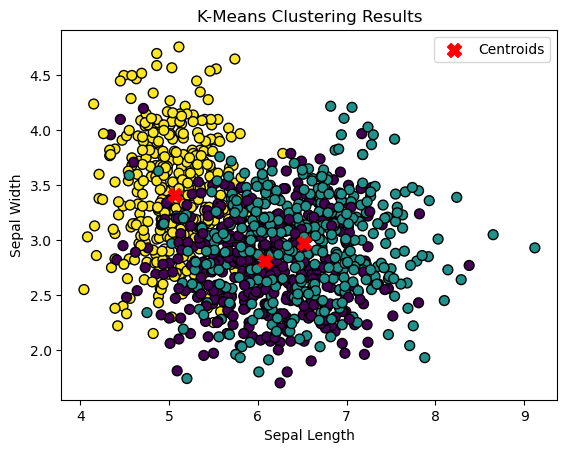

In [36]:
# apply kmeans with k = number of classes in our dataset
k = len(ts['species'].unique())

centroids, labels = kmeans(x, k)

plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()